In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("./data/resource/GRAVES_PROFILE.png", cv2.IMREAD_GRAYSCALE)

ret, thr_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("Binary Image", thr_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# 1. 이미지로드 및 크기 정보 획득 (image_d03275.png내용)
img = cv2.imread('./data/resource/GRAVES_PROFILE.png')
h, w = img.shape[:2]

# 2. 이미지필터링 (Filtering): 가우시안블러


# 픽셀값을 주변과 섞어 부드럽게 만듦 (g(x)= h(f(x)))
blur_img = cv2.GaussianBlur(img, (5,5), 0)

# 3. 이미지워핑(Warping): 크기조절
# 픽셀좌표를 이동시켜 크기를 변경 (g(x)= f(h(x)))

warped_img = cv2.resize(img, (w// 2, h // 2))

# 4. 이진화(Thresholding):image_da2e3c.jpg 수식구현

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh_img = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY)

# 5. 미분을이용한 에지 검출 (SobelFilter)
# x방향미분값을 구해 세로선 강조
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)

# 결과확인
cv2.imshow('Filtering (Blur)', blur_img)
cv2.imshow('Thresholding', thresh_img)
cv2.imshow('Warped', warped_img)
cv2.imshow('Edge (Sobel)', sobel_x)
cv2.waitKey(0)
cv2.destroyAllWindows()

type: <class 'numpy.ndarray'>
shape (H, W, C): (1200, 1200, 3)
dtype: uint8
min/max: 0, 255


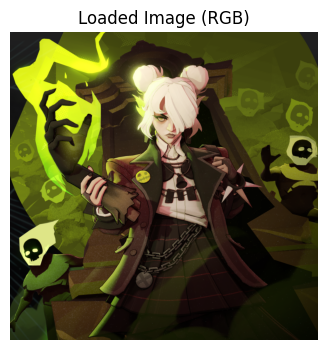

In [8]:
img_bgr = cv2.imread('./data/resource/GRAVES_PROFILE.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

try:
    print(f'type: {type(img_bgr)}')
    print(f'shape (H, W, C): {img_bgr.shape}')
    print(f'dtype: {img_bgr.dtype}')
    print(f'min/max: {img_bgr.min()}, {img_bgr.max()}')
    plt.figure(figsize=(7, 4))
    plt.imshow(img_rgb)
    plt.title('Loaded Image (RGB)')
    plt.axis('off')
    plt.show

except:
    raise FileNotFoundError('No image detected. Check file path')


pixet at (y=10, x=10) in bgr: 225, 225, 225


<function matplotlib.pyplot.show(close=None, block=None)>

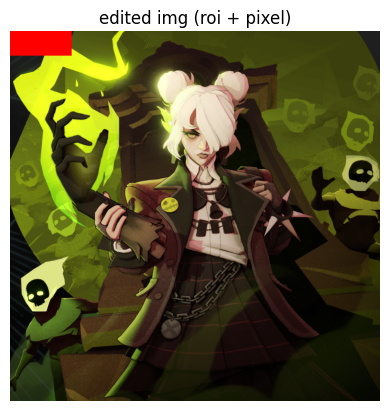

In [6]:
img_bgr = cv2.imread('./data/resource/GRAVES_PROFILE.png')

y, x = 10, 10

b, g, r =- img_bgr[y, x]
print(f'pixet at (y={y}, x={x}) in bgr: {int(b)}, {int(g)}, {int(r)}')

img_edit = img_bgr.copy()
img_edit[0:80, 0:200] = (0, 0, 255)

img_edit_rgb = cv2.cvtColor(img_edit, cv2.COLOR_BGR2RGB)

plt.Figure(figsize=(7, 4))
plt.imshow(img_edit_rgb)
plt.title('edited img (roi + pixel)')
plt.axis('off')
plt.show

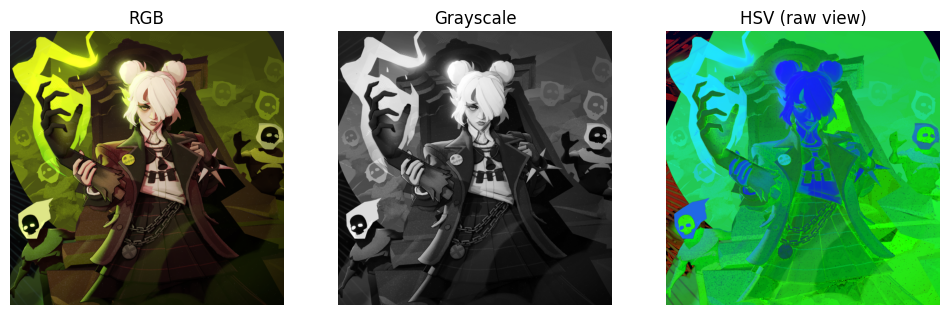

In [7]:
img_bgr = cv2.imread('./data/resource/GRAVES_PROFILE.png')

try:
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('RGB')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img_gray, cmap="gray")
    plt.title('Grayscale')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img_hsv)
    plt.title('HSV (raw view)')
    plt.axis('off')

    plt.show

except:
    raise FileNotFoundError('No image detected. Check file path')

(np.float64(-0.5), np.float64(1199.5), np.float64(1199.5), np.float64(-0.5))

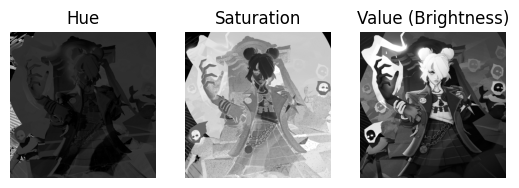

In [18]:
h, s, v = cv2.split(img_hsv)

plt.Figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap="gray")
plt.title('Hue')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap="gray")
plt.title('Saturation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap="gray")
plt.title('Value (Brightness)')
plt.axis('off')

(np.float64(-0.5), np.float64(1199.5), np.float64(1199.5), np.float64(-0.5))

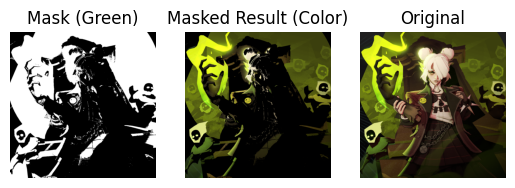

In [24]:
img_bgr = cv2.imread('./data/resource/GRAVES_PROFILE.png')
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

lower_green = np.array([20, 40, 40])
# lower_green = np.array([90, 50, 50])
upper_green = np.array([90, 255, 255])

mask = cv2.inRange(img_hsv, lower_green, upper_green)
result = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.Figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(mask, cmap="gray")
plt.title('Mask (Green)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result_rgb)
plt.title('Masked Result (Color)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

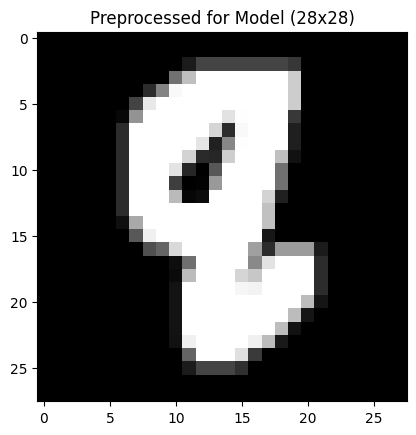

In [30]:
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms


def preprocess_image_advanced(image_path):
    # 1. OpenCV로 이미지 로드 (그레이스케일)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
   
    # 2. 노이즈 제거 (가우시안 블러)
    img_blurred = cv2.GaussianBlur(img, (5, 5), 0)
   
    # 3. 적응형 이진화 (조명이 일정하지 않아도 글씨를 잘 추출함)
    # 주변 픽셀보다 어두운 부분을 글씨로 인식 (배경 흰색 -> 0, 글씨 검은색 -> 255)
    thresh = cv2.adaptiveThreshold(img_blurred, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
   
    # 4. 글씨가 있는 부분(객체)의 경계 상자(Bounding Box) 찾기
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
   
    if contours:
        # 가장 큰 객체(아마도 숫자)를 선택
        cnt = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cnt)
       
        # 숫자 부분만 잘라내기
        digit = thresh[y:y+h, x:x+w]
       
        # 숫자의 비율을 유지하면서 패딩을 주어 정사각형 만들기
        sz = max(w, h)
        pad_digit = np.zeros((sz, sz), dtype=np.uint8)
       
        # 중앙에 배치
        dx = (sz - w) // 2
        dy = (sz - h) // 2
        pad_digit[dy:dy+h, dx:dx+w] = digit
       
        # 5. MNIST 크기(28x28)로 리사이즈 및 테두리 여백(padding) 추가
        # 숫자가 너무 꽉 차 있으면 인식이 잘 안 되므로 여백(4px)을 줍니다.
        kernel = np.ones((3,3), np.uint8)
        pad_digit = cv2.dilate(pad_digit, kernel, iterations=1) # 글씨를 약간 두껍게
        final_img = cv2.copyMakeBorder(pad_digit, 4, 4, 4, 4, cv2.BORDER_CONSTANT, value=0)
        final_img = cv2.resize(final_img, (28, 28), interpolation=cv2.INTER_AREA)
    else:
        # 객체를 못 찾은 경우 기본 리사이즈
        final_img = cv2.resize(thresh, (28, 28))

    # 6. PyTorch 텐서로 변환
    # PIL 이미지로 변환 후 기존 transform 적용
    final_pil = Image.fromarray(final_img)
   
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
   
    return transform(final_pil).unsqueeze(0), final_img # 시각화용 이미지도 함께 반환

# 사용 예시
image_path = './data/resource/ex1.png'
input_tensor, processed_img = preprocess_image_advanced(image_path)

# 시각화로 확인
plt.imshow(processed_img, cmap='gray')
plt.title("Preprocessed for Model (28x28)")
plt.show()